<a href="https://colab.research.google.com/github/Venu212/AI_ML_Texas_University/blob/main/Default_on_Loan_Payement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Default on Loan payment

## Default on Loan payment

## Default on Loan payment

* The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not.
* Provided is a sample that contains the data of 90,000 + clients
* Bank needa to come up with a classification model that will help the bank improve its services so that customers do not churn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import pickle
import joblib

In [ ]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




In [ ]:
import xgboost as xgb
import lightgbm as lgb
#import catboost as cb
import time
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# load data
# mount drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data from drive
df = pd.read_csv('/content/drive/MyDrive/AI_ML_Texas/Hackathon/data/Train_set_(1)_(2).csv')


In [ ]:
# load data from drive
df_test = pd.read_csv('/content/drive/MyDrive/AI_ML_Texas/Hackathon/data/Test_set_(1)_(1).csv')

In [ ]:
df.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


In [ ]:
df.tail()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93169,65577252,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.0,Not Verified,...,0.0,0.0,7924,38.0,55.34,INDIVIDUAL,13.0,64635.0,47600.0,0
93170,836021,3500,3 years,5.42,A,A1,NaN,MORTGAGE,57550.0,Not Verified,...,0.0,0.0,10174,24.0,299.67,INDIVIDUAL,161.0,NaN,NaN,1
93171,33058720,8000,3 years,13.98,C,C3,10+ years,RENT,148531.5,Source Verified,...,1.0,0.0,5391,25.0,1150.58,INDIVIDUAL,65.0,94596.0,6500.0,0
93172,4060472,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.0,Verified,...,0.0,0.0,24609,45.0,5764.58,INDIVIDUAL,56.0,33759.0,34900.0,1
93173,3628127,10000,3 years,15.80,C,C3,<5 Years,RENT,60000.0,Verified,...,0.0,0.0,11285,7.0,2279.36,INDIVIDUAL,104.0,25594.0,12300.0,0


In [ ]:

print(df.shape)
print(df.info())
print(df.describe())


(93174, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs        

In [ ]:
print(df.isna().sum())

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64


In [ ]:
# check if NULL or NaN
print(df.isnull().sum())
print("is NA")
print(df.isna().sum())



ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64
is NA
ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
l

In [ ]:
df['default'].value_counts()

default
0    71045
1    22129
Name: count, dtype: int64

Data set is unbalanced

In [ ]:
df[['annual_income','total_current_balance','total_revolving_limit','last_week_pay','job_experience']].isna().sum()

annual_income               1
total_current_balance    7386
total_revolving_limit    7386
last_week_pay            1924
job_experience           4702
dtype: int64

In [ ]:
df['job_experience'].value_counts()

job_experience
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: count, dtype: int64

In [ ]:
# Check category columns
df.describe(include='object').T

,count,unique,top,freq
loan_term,93174,2,3 years,65211
loan_grade,93174,7,B,26865
loan_subgrade,93174,35,B3,5879
job_experience,88472,3,<5 Years,40610
home_ownership,93174,5,MORTGAGE,46445
income_verification_status,93174,3,Source Verified,34487
loan_purpose,93174,4,debt_consolidation,55241
state_code,93174,50,CA,13744
application_type,93174,2,INDIVIDUAL,93118


# Any outliers

In [ ]:
def univariate_analysis(df):
  # univariate analysis
  fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Create a 2x4 grid of subplots
  axes = axes.flatten()  # Flatten the axes array for easier iteration
  i = 0
  for column in df.select_dtypes(include=['number']):  # Select only numeric columns
      if i < 8:  # Ensure the subplot index is within the valid range
          sns.histplot(df[column], ax=axes[i])  # Use Seaborn's histplot
          axes[i].set_xlabel(column)
          i += 1
      else:
          break  # Stop adding subplots if we reach the limit

  plt.tight_layout()  # Adjust subplot parameters for better fit
  plt.show()

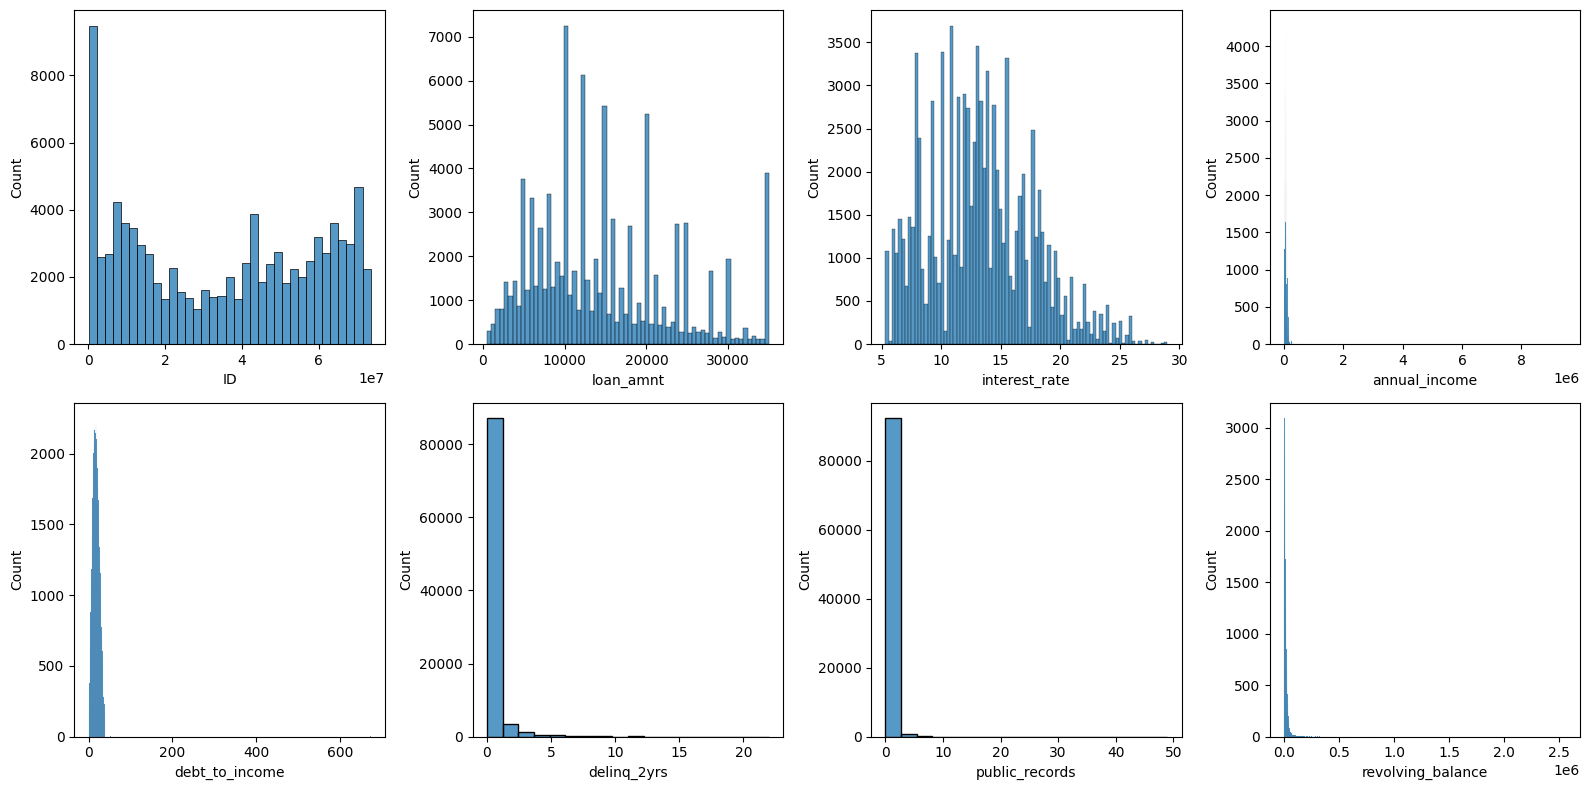

In [ ]:
univariate_analysis(df)

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

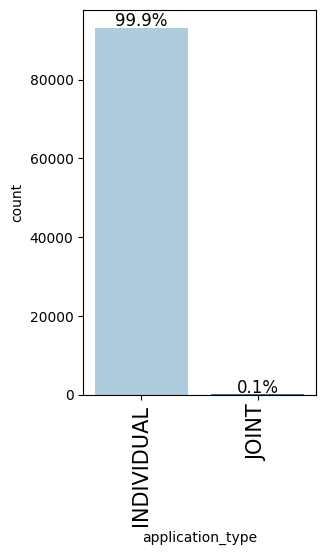

In [ ]:
labeled_barplot(df, 'application_type', perc=True)

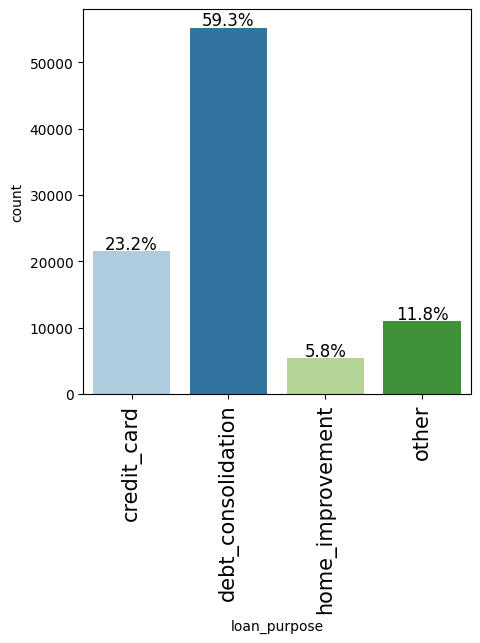

In [ ]:
labeled_barplot(df, 'loan_purpose', perc=True)

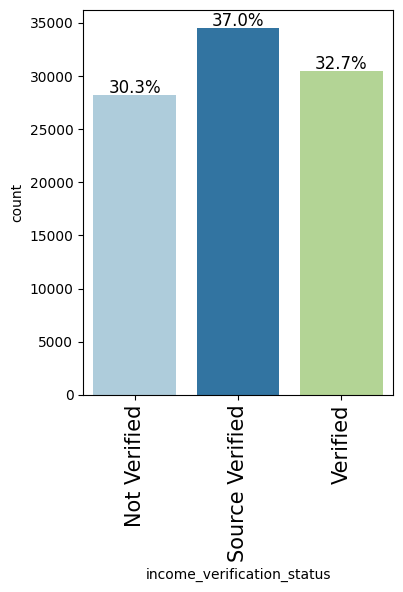

In [ ]:
labeled_barplot(df, 'income_verification_status', perc=True)

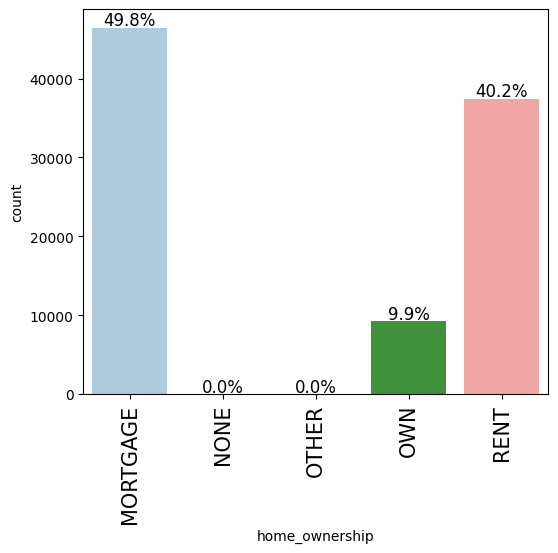

In [ ]:
labeled_barplot(df, 'home_ownership', perc=True)

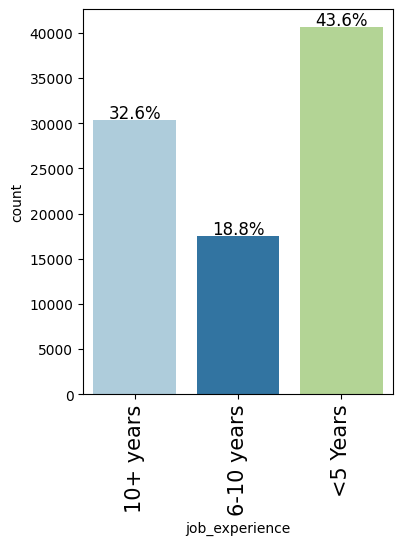

In [ ]:
labeled_barplot(df, 'job_experience', perc=True)

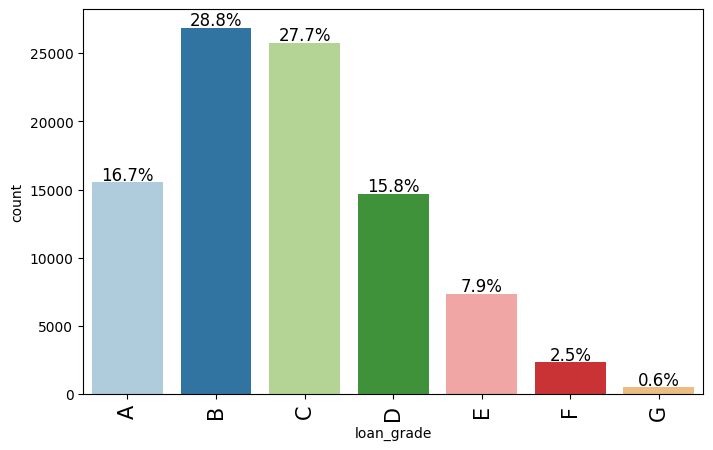

In [ ]:
labeled_barplot(df, 'loan_grade', perc=True)

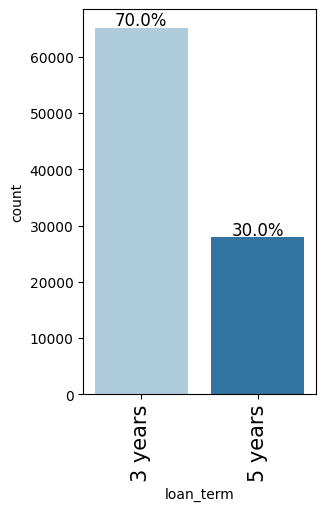

In [ ]:
labeled_barplot(df, 'loan_term', perc=True)

In [ ]:
# check the skewness
## check the skewness
def measure_skewness(df,skew_limit = 0.7):
    skewness = {}
    for col in df.select_dtypes(include=['number']).columns: # Select only numeric columns
        skewness[col] = df[col].skew()
        # Use skewness[col] to access the skewness value for the current column
        if skewness[col] + skew_limit < 0:
          print(col, ": left skewed", str(skewness[col]))
        elif skewness[col] > skew_limit:
          print(col, ": right skewed", str(skewness[col]))
        else:
          print(col, ": not skewed", str(skewness[col]))
    return skewness

In [ ]:
measure_skewness(df)

ID : not skewed 0.017670290727488994
loan_amnt : not skewed 0.6865897289841321
interest_rate : not skewed 0.4260243845932469
annual_income : right skewed 56.67084259234959
debt_to_income : right skewed 5.005686475425659
delinq_2yrs : right skewed 5.6590501169832255
public_records : right skewed 10.940286697293667
revolving_balance : right skewed 24.717051530988908
total_acc : right skewed 0.8927615518520063
interest_receive : right skewed 2.8350850429445345
last_week_pay : right skewed 1.0122497321817774
total_current_balance : right skewed 4.365655429247777
total_revolving_limit : right skewed 113.43066110990338
default : right skewed 1.233702015920811


{'ID': 0.017670290727488994,
 'loan_amnt': 0.6865897289841321,
 'interest_rate': 0.4260243845932469,
 'annual_income': 56.67084259234959,
 'debt_to_income': 5.005686475425659,
 'delinq_2yrs': 5.6590501169832255,
 'public_records': 10.940286697293667,
 'revolving_balance': 24.717051530988908,
 'total_acc': 0.8927615518520063,
 'interest_receive': 2.8350850429445345,
 'last_week_pay': 1.0122497321817774,
 'total_current_balance': 4.365655429247777,
 'total_revolving_limit': 113.43066110990338,
 'default': 1.233702015920811}

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# get all numeric columns
df_numeric = df.select_dtypes(include=['number'])
df_numeric.columns

Index(['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
       'interest_receive', 'last_week_pay', 'total_current_balance',
       'total_revolving_limit', 'default'],
      dtype='object')

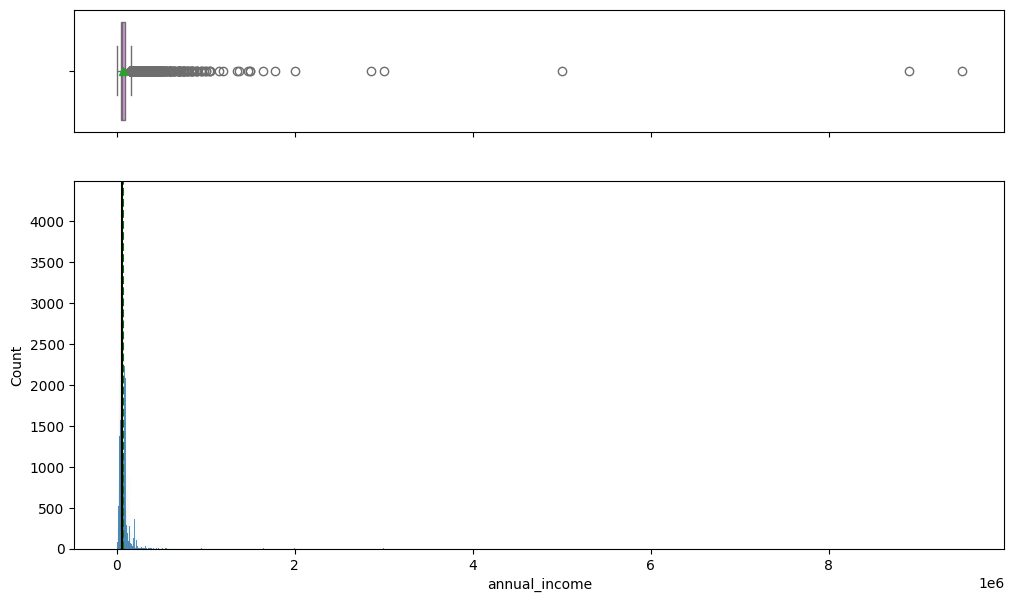

In [ ]:
histogram_boxplot(df, 'annual_income')

In [ ]:
df['annual_income'].sort_values(ascending=False).head(10)

41669    9500000.0
26367    8900060.0
26494    5000000.0
53014    3000000.0
17201    2854800.0
31267    2000000.0
74903    1782000.0
1538     1650000.0
27998    1500000.0
3319     1500000.0
Name: annual_income, dtype: float64

In [ ]:
df.loc[df['annual_income'] >  1500000.0]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
1538,60889252,35000,5 years,10.99,B,B4,<5 Years,MORTGAGE,1650000.0,Source Verified,...,1.0,0.0,26700,48.0,906.75,INDIVIDUAL,13.0,76026.0,70900.0,0
17201,59680322,10000,3 years,10.99,B,B4,NaN,OWN,2854800.0,Source Verified,...,0.0,0.0,7071,22.0,430.02,INDIVIDUAL,22.0,20447.0,34000.0,0
26367,58711625,10550,3 years,15.61,D,D1,10+ years,RENT,8900060.0,Source Verified,...,0.0,0.0,5311,11.0,637.36,INDIVIDUAL,26.0,21988.0,5200.0,0
26494,2839463,35000,3 years,15.31,C,C2,10+ years,MORTGAGE,5000000.0,Verified,...,1.0,0.0,975800,36.0,8114.63,INDIVIDUAL,117.0,8000078.0,988000.0,1
31267,8548808,35000,3 years,8.90,A,A5,10+ years,MORTGAGE,2000000.0,Verified,...,0.0,0.0,2458,23.0,4481.05,INDIVIDUAL,113.0,1772233.0,90600.0,0
41669,57607924,24000,5 years,7.89,A,A5,10+ years,MORTGAGE,9500000.0,Source Verified,...,0.0,0.0,16854,31.0,903.69,INDIVIDUAL,26.0,256653.0,84200.0,0
53014,70370337,21000,5 years,17.57,D,D4,<5 Years,RENT,3000000.0,Source Verified,...,0.0,0.0,9136,42.0,266.48,INDIVIDUAL,4.0,54497.0,19800.0,0
74903,1100269,12025,3 years,14.27,C,C2,10+ years,RENT,1782000.0,Not Verified,...,0.0,0.0,49208,30.0,2815.61,INDIVIDUAL,157.0,NaN,NaN,1


In [ ]:
df_loan['loan_subgrade'].value_counts()

loan_subgrade
B3    5879
B4    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: count, dtype: int64

##### Interestingky high income group also are in defaulters group

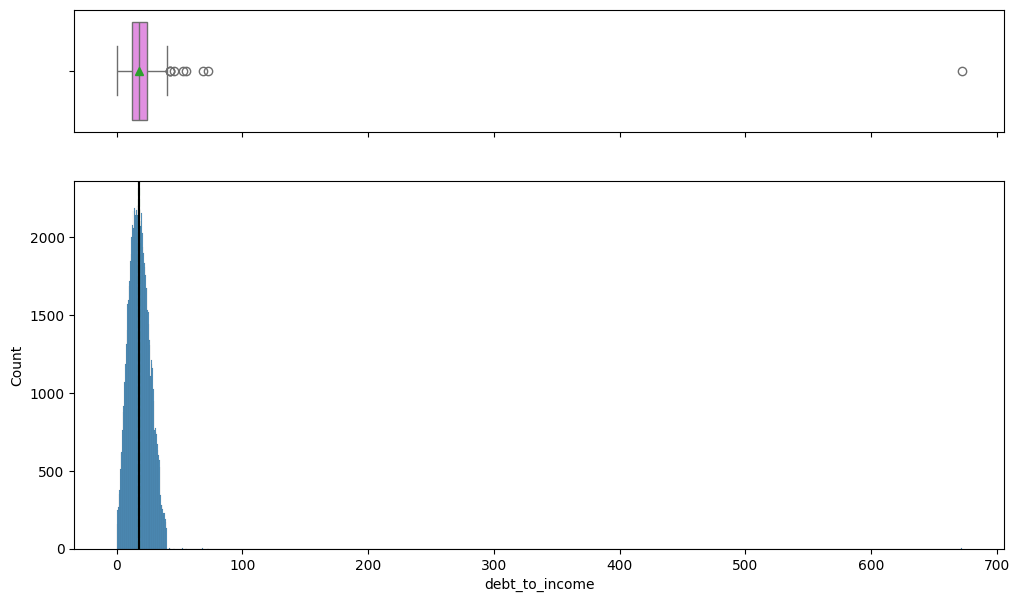

In [ ]:
histogram_boxplot(df, 'debt_to_income')


In [ ]:
df['loan_grade'].sort_values(ascending=False).head(10)

47302    G
21911    G
61533    G
11959    G
17589    G
46649    G
42828    G
69699    G
73454    G
79141    G
Name: loan_grade, dtype: object

In [ ]:
df.loc[df['debt_to_income'] ==  672.52]

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
12309,68509498,12000,3 years,19.99,E,E4,NaN,RENT,1200.0,Verified,...,0.0,0.0,1661,13.0,369.05,JOINT,9.0,21380.0,2300.0,0


In [ ]:
#df['loan_subgrade'].value_counts()

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

default         0      1    All
loan_grade                     
All         71045  22129  93174
B           19787   7078  26865
C           20203   5584  25787
A           11281   4253  15534
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


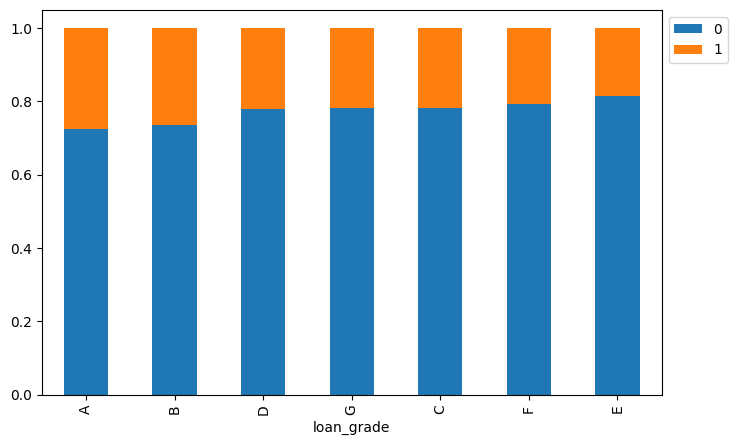

In [ ]:
stacked_barplot(df, 'loan_grade','default')

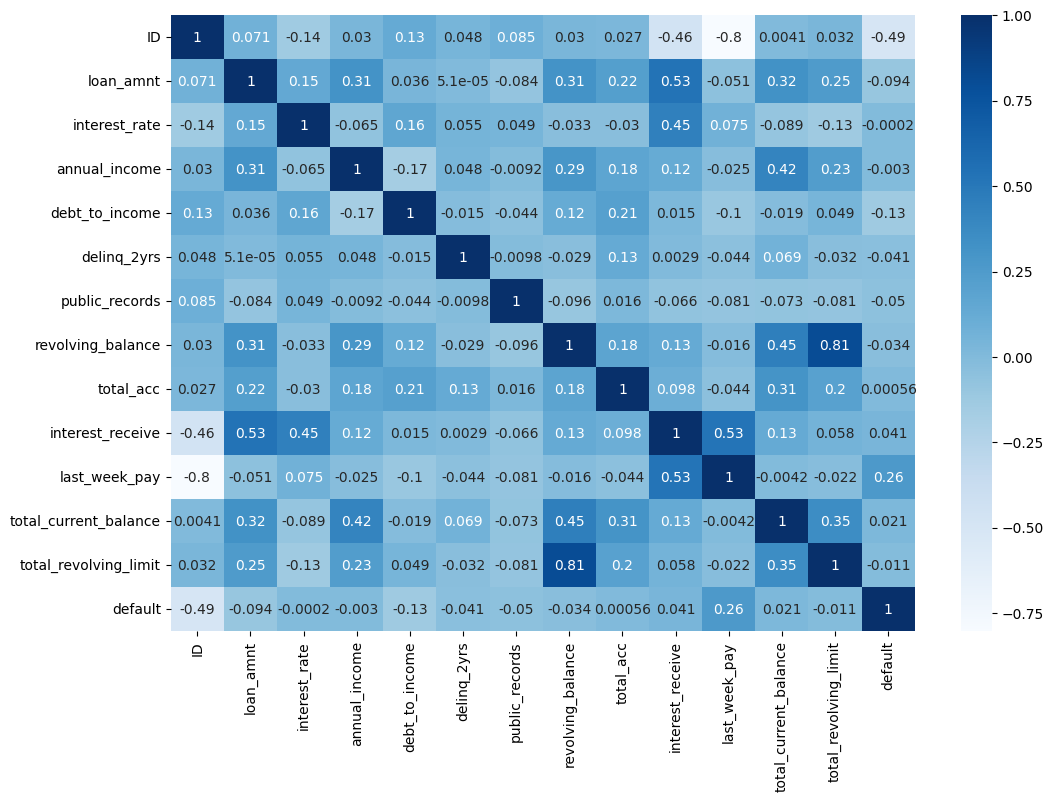

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="Blues")
plt.show()

* Total revolving limit and revolving balane are correlated : 0.79

In [ ]:
# Check for outliers
df_numeric = df.select_dtypes(include=['number'])
df_numeric.columns


Index(['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
       'interest_receive', 'last_week_pay', 'total_current_balance',
       'total_revolving_limit', 'default'],
      dtype='object')

In [ ]:
df_loan = df.copy()

In [ ]:
df.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default'],
      dtype='object')

In [ ]:
df_loan.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default'],
      dtype='object')

In [ ]:
# Split the data into train and validate data.
X = df_loan.drop(columns =['default','home_ownership','state_code','total_revolving_limit','loan_subgrade'], axis=1)
y = df_loan['default']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



Impute and scale results

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74539 entries, 15521 to 15795
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          74539 non-null  int64  
 1   loan_amnt                   74539 non-null  int64  
 2   loan_term                   74539 non-null  object 
 3   interest_rate               74539 non-null  float64
 4   loan_grade                  74539 non-null  object 
 5   job_experience              70793 non-null  object 
 6   annual_income               74538 non-null  float64
 7   income_verification_status  74539 non-null  object 
 8   loan_purpose                74539 non-null  object 
 9   debt_to_income              74539 non-null  float64
 10  delinq_2yrs                 74537 non-null  float64
 11  public_records              74537 non-null  float64
 12  revolving_balance           74539 non-null  int64  
 13  total_acc                   7453

In [ ]:
#Let's impute the missing values
# X_train['job_experience'] = X_train['job_experience'].fillna(X_train['job_experience'].mode()[0])
# X_train['annual_income'] = X_train['annual_income'].fillna(X_train['annual_income'].mean())
# X_train['total_current_balance'] = X_train['total_current_balance'].fillna(X_train['total_current_balance'].mean())
# X_train['total_revolving_limit'] = X_train['total_revolving_limit'].fillna(X_train['total_revolving_limit'].mean())
# X_train['last_week_pay'] = X_train['last_week_pay'].fillna(X_train['last_week_pay'].mean())



In [ ]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["job_experience"]
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])


In [ ]:
X_train['annual_income'] = imp_mode.fit_transform(X_train[['annual_income']])
X_val['annual_income'] = imp_mode.transform(X_val[['annual_income']])

X_train['total_current_balance'] = imp_mode.fit_transform(X_train[['total_current_balance']])
X_val['total_current_balance'] = imp_mode.transform(X_val[['total_current_balance']])

#X_train['total_revolving_limit'] = imp_mode.fit_transform(X_train[['total_revolving_limit']])
#X_val['total_revolving_limit'] = imp_mode.transform(X_val[['total_revolving_limit']])

X_train['last_week_pay'] = imp_mode.fit_transform(X_train[['last_week_pay']])
X_val['last_week_pay'] = imp_mode.transform(X_val[['last_week_pay']])



In [ ]:
X_val.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
job_experience                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
dtype: int64

In [ ]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)


In [ ]:
y_train.value_counts(0)/y_train.shape[0]
 #['default'].value_counts()

default
0    0.764191
1    0.235809
Name: count, dtype: float64

In [ ]:
X_train.shape

(74539, 27)

In [ ]:
X_val.shape

(18635, 27)

### Model Building

* The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

Metric : Precision

In [ ]:
print("X-Train Shape",X_train.shape)
print("X_val Shape",X_val.shape)


X-Train Shape (74539, 27)
X_val Shape (18635, 27)


In [ ]:
X_train.columns

Index(['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
       'interest_receive', 'last_week_pay', 'total_current_balance',
       'loan_term_5 years', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'job_experience_6-10 years', 'job_experience_<5 Years',
       'income_verification_status_Source Verified',
       'income_verification_status_Verified',
       'loan_purpose_debt_consolidation', 'loan_purpose_home_improvement',
       'loan_purpose_other', 'application_type_JOINT'],
      dtype='object')

### Do we need to scale ??

#### Check for outliers
#### Impute null values
##### Scale data set

#### Data is not balanced

#### Imputing and transforming missing values

In [ ]:
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection

from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
# def model_performance_classification_sklearn(model, predictors, target):
#     """
#     Function to compute different metrics to check classification model performance

#     model: classifier
#     predictors: independent variables
#     target: dependent variable
#     """

#     # predicting using the independent variables
#     pred = model.predict(predictors)

#     acc = accuracy_score(target, pred)  # to compute Accuracy
#     recall = recall_score(target, pred)  # to compute Recall
#     precision = precision_score(target, pred)  # to compute Precision
#     f1 = f1_score(target, pred)  # to compute F1-score

#     # creating a dataframe of metrics
#     df_perf = pd.DataFrame(
#         {
#             "Accuracy": acc,
#             "Recall": recall,
#             "Precision": precision,
#             "F1": f1

#         },
#         index=[0],
#     )

#     return df_perf

#### model building with original data

In [ ]:
for df in [X_train, X_val]:
    for col in df.columns:
        if df[col].dtype != 'object':  # Impute only numerical features
            df[col] = df[col].fillna(df[col].median())

In [ ]:
# models = []  # Empty list to store all the models

# # Appending models into the list
# models.append(("Bagging", BaggingClassifier(random_state=1)))
# models.append(("Random forest", RandomForestClassifier(random_state=1)))

# ## Complete the code to append remaining 3 models in the list models
# models.append(("GBM", GradientBoostingClassifier(random_state=1)))
# models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
# models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# print("\n" "Training Performance:" "\n")
# for name, model in models:

#   model.fit(X_train, y_train)
#   recall_scores = recall_score(y_train, model.predict(X_train))
#   precision_scores = precision_score(y_train, model.predict(X_train))
#   accuracy_scores = accuracy_score(y_train, model.predict(X_train))

#   recall_scores_val = recall_score(y_val, model.predict(X_val))
#   precision_scores_val = precision_score(y_val, model.predict(X_val))
#   accuracy_scores_val = accuracy_score(y_val, model.predict(X_val))

#   print("Model      :{}  Training Score --  Validation Score ".format(model))
#   print("Recall     : {} -- {}".format(recall_scores,recall_scores_val))

#   print("Precision  : {} -- {}".format(precision_scores,precision_scores_val))

#   print("Accuracy   : {} -- {}".format(accuracy_scores,accuracy_scores_val))
#   print("--------------------------------")


### Let's try with base model


In [ ]:
# import pandas as pd
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# import sklearn.metrics as metrics
# import sklearn.model_selection as model_selection

# from sklearn.metrics import recall_score
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier

# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # defining a function to compute different metrics to check performance of a classification model built using sklearn
# def model_performance_classification_sklearn(model, predictors, target):
#     """
#     Function to compute different metrics to check classification model performance

#     model: classifier
#     predictors: independent variables
#     target: dependent variable
#     """

#     # predicting using the independent variables
#     pred = model.predict(predictors)

#     acc = accuracy_score(target, pred)  # to compute Accuracy
#     recall = recall_score(target, pred)  # to compute Recall
#     precision = precision_score(target, pred)  # to compute Precision
#     f1 = f1_score(target, pred)  # to compute F1-score

#     # creating a dataframe of metrics
#     df_perf = pd.DataFrame(
#         {
#             "Accuracy": acc,
#             "Recall": recall,
#             "Precision": precision,
#             "F1": f1

#         },
#         index=[0],
#     )

#     return df_perf

# models = []  # Empty list to store all the models

# # Appending models into the list
# models.append(("Bagging", BaggingClassifier(random_state=1)))
# models.append(("Random forest", RandomForestClassifier(random_state=1)))

# ## Complete the code to append remaining 3 models in the list models
# models.append(("GBM", GradientBoostingClassifier(random_state=1)))
# models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
# models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# # Impute missing values in X_train and X_val (replace with median for numerical features)
# for df in [X_train, X_val]:
#     for col in df.columns:
#         if df[col].dtype != 'object':  # Impute only numerical features
#             df[col] = df[col].fillna(df[col].median())

# print("\n" "Training Performance:" "\n")
# for name, model in models:

#   model.fit(X_train, y_train)
#   recall_scores = recall_score(y_train, model.predict(X_train))
#   precision_scores = precision_score(y_train, model.predict(X_train))
#   accuracy_scores = accuracy_score(y_train, model.predict(X_train))

#   recall_scores_val = recall_score(y_val, model.predict(X_val))
#   precision_scores_val = precision_score(y_val, model.predict(X_val))
#   accuracy_scores_val = accuracy_score(y_val, model.predict(X_val))

#   print("Model      :{}  Training Score --  Validation Score ".format(model))
#   print("Recall     : {} -- {}".format(recall_scores,recall_scores_val))

#   print("Precision  : {} -- {}".format(precision_scores,precision_scores_val))

#   print("Accuracy   : {} -- {}".format(accuracy_scores,accuracy_scores_val))
#   print("--------------------------------")


In [ ]:
#rename job_experience_<5 Years to job_experience_lt_5_years to 5 years


X_train = X_train.rename(columns={'job_experience_<5 Years': 'job_experience_lt_5_years'})
X_val = X_val.rename(columns={'job_experience_<5 Years': 'job_experience_lt_5_years'})


In [ ]:
X_train.columns

Index(['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
       'interest_receive', 'last_week_pay', 'total_current_balance',
       'loan_term_5 years', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'job_experience_6-10 years', 'job_experience_lt_5_years',
       'income_verification_status_Source Verified',
       'income_verification_status_Verified',
       'loan_purpose_debt_consolidation', 'loan_purpose_home_improvement',
       'loan_purpose_other', 'application_type_JOINT'],
      dtype='object')

In [ ]:
## Second best

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
# def model_performance_classification_sklearn(model, predictors, target):
#     """
#     Function to compute different metrics to check classification model performance

#     model: classifier
#     predictors: independent variables
#     target: dependent variable
#     """

#     # predicting using the independent variables
#     pred = model.predict(predictors)

#     acc = accuracy_score(target, pred)  # to compute Accuracy
#     recall = recall_score(target, pred)  # to compute Recall
#     precision = precision_score(target, pred)  # to compute Precision
#     f1 = f1_score(target, pred)  # to compute F1-score

#     # creating a dataframe of metrics
#     df_perf = pd.DataFrame(
#         {
#             "Accuracy": acc,
#             "Recall": recall,
#             "Precision": precision,
#             "F1": f1

#         },
#         index=[0],
#     )

#     return df_perf

# models = []  # Empty list to store all the models

# # Appending models into the list
# models.append(("Bagging", BaggingClassifier(random_state=1)))
# models.append(("Random forest", RandomForestClassifier(random_state=1)))

# ## Complete the code to append remaining 3 models in the list models
# models.append(("GBM", GradientBoostingClassifier(random_state=1)))
# models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
# optimization_dict = {'max_depth': [3,5,7],
#                      'learning_rate': [0.1, 0.06, 0.05],
#                      'subsample': [0.5, 0.7, 1],

#                      'n_estimators': [50,100,200]}

# models.append(("Xgboost_1",GridSearchCV(XGBClassifier, optimization_dict,cv=5, scoring='accuracy', verbose=1))) # append takes only one argument, changed to add a tuple similar to other models

# RandomizedSearchCV(XGBClassifier, param_distributions=optimization_dict, n_iter=10, cv=5, scoring='accuracy')


# #models.append(("Xgboost_1", XGBClassifier(random_state=1, eval_metric="logloss", n_estimators=200)))
# models.append(("dtree", DecisionTreeClassifier(random_state=1)))


# print("\n" "Training Performance:" "\n")
# for name, model in models:
#     # Check column names and convert to strings
#     X_train.columns = [str(col) for col in X_train.columns]
#     X_val.columns = [str(col) for col in X_val.columns]

#     model.fit(X_train, y_train)
#     recall_scores = recall_score(y_train, model.predict(X_train))
#     precision_scores = precision_score(y_train, model.predict(X_train))
#     accuracy_scores = accuracy_score(y_train, model.predict(X_train))

#     recall_scores_val = recall_score(y_val, model.predict(X_val))
#     precision_scores_val = precision_score(y_val, model.predict(X_val))
#     accuracy_scores_val = accuracy_score(y_val, model.predict(X_val))

#     print("Model      :{}  Training Score --  Validation Score ".format(model))
#     print("Recall     : {} -- {}".format(recall_scores,recall_scores_val))

#     print("Precision  : {} -- {}".format(precision_scores,precision_scores_val))

#     print("Accuracy   : {} -- {}".format(accuracy_scores,accuracy_scores_val))
#     print("--------------------------------")

### XG boost is the classifier
Model      :XGBClassifier(base_score=None, booster=None, )  

* Metric -Training Score --  Validation Score

- Recall     : 0.8950901746600671 -- 0.8391915641476274
- Precision  : 0.849055585536967 -- 0.7973283239407222
- Accuracy   : 0.9377372918874683 -- 0.9086128253286826

### Latest

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
from sklearn.model_selection import GridSearchCV
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

models = []  # Empty list to store all the models

# Appending models into the list
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

models.append(("Bagging_1", GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),n_estimators=100, max_features=0.5), param_grid,scoring = 'accuracy')))
models.append(("Random forest_1", GridSearchCV(RandomForestClassifier(), param_grid,scoring = 'accuracy')))


models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))

## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss", max_depath = 8)))
optimization_dict = {'max_depth': [3,5,7],
                     'learning_rate': [0.1, 0.06, 0.05],
                     'subsample': [0.5, 0.7],
                     'colsample_bytree': [0.3, 0.5, 0.7, 0.9],

                     'n_estimators': [50,100,1000]}

# optimization_dict ={

#     'learning_rate' : [0.1,0.08],
#     'n_estimators' : [10],
#     'max_depth': [5],
#     'min_child_weight':[2],
#     'gamma':[0.1],
#     'subsample':[0.85],
#     'colsample_bytree':[0.8],
#     'objective': ['binary:logistic'],
#     'nthread':[4],
#     'scale_pos_weight':[1],
#     'seed':[27],
#     'param_grid' : ['param_test'],
#     'scoring':['accuracy'],
#     'n_jobs':[4],
#     'iid':[False],
#     'cv':[2],
#     'verbose':[10]}

# Changed XGBClassifier to XGBClassifier() to create an instance of the class
#models.append(("Xgboost_1",GridSearchCV(XGBClassifier(), optimization_dict,cv=5, scoring='accuracy', verbose=1))) # append takes only one argument, changed to add a tuple similar to other models
# ----------------------
# models.append(("Xgboost_2",RandomizedSearchCV(XGBClassifier(), param_distributions=optimization_dict, n_iter=10, cv=5, scoring='accuracy')))


# #models.append(("Xgboost_1", XGBClassifier(random_state=1, eval_metric="logloss", n_estimators=200)))
# models.append(("dtree", DecisionTreeClassifier(random_state=1)))


# print("\n" "Training Performance:" "\n")
# for name, model in models:
#     # Check column names and convert to strings
#     X_train.columns = [str(col) for col in X_train.columns]
#     X_val.columns = [str(col) for col in X_val.columns]

#     model.fit(X_train, y_train)
#     recall_scores = recall_score(y_train, model.predict(X_train))
#     precision_scores = precision_score(y_train, model.predict(X_train))
#     accuracy_scores = accuracy_score(y_train, model.predict(X_train))

#     recall_scores_val = recall_score(y_val, model.predict(X_val))
#     precision_scores_val = precision_score(y_val, model.predict(X_val))
#     accuracy_scores_val = accuracy_score(y_val, model.predict(X_val))
#     print("name",name)
#     print("Model      :{}  Training Score --  Validation Score ".format(model))
#     print("Recall     : {} -- {}".format(recall_scores,recall_scores_val))

#     print("Precision  : {} -- {}".format(precision_scores,precision_scores_val))

#     print("Accuracy   : {} -- {}".format(accuracy_scores,accuracy_scores_val))
#     print("--------------------------------")


Training Performance:

name Bagging_1
Model      :GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')  Training Score --  Validation Score 
Recall     : 0.3558058826876031 -- 0.3563268892794376
Precision  : 0.8473106625118547 -- 0.8591101694915254
Accuracy   : 0.832973342813829 -- 0.8284947679098471
--------------------------------


ValueError: Invalid parameter 'base_estimator' for estimator RandomForestClassifier(). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1))) #0
models.append(("Random forest", RandomForestClassifier(random_state=1))) #1

## Complete the code to append remaining 3 models in the list models
models.append(("GBM", GradientBoostingClassifier(random_state=1)))  #2
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))  #3
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss"))) #4

models.append(("Xgboost_1_1", XGBClassifier(random_state=1, eval_metric="logloss",n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)))
#5

optimization_dict = {'max_depth': [3,5,6],
                     'learning_rate': [0.1, 0.04, 0.05], #005
                     'subsample': [0.5, 0.7, 1],

                     'n_estimators': [50,200,1000]}  #1000

# Changed XGBClassifier to XGBClassifier() to create an instance of the class
models.append(("Xgboost_1",GridSearchCV(XGBClassifier(), optimization_dict,cv=6, scoring='accuracy', verbose=1))) # append takes only one argument, changed to add a tuple similar to other models
#6

RandomizedSearchCV(XGBClassifier(), param_distributions=optimization_dict, n_iter=10, cv=5, scoring='accuracy')


#models.append(("Xgboost_1", XGBClassifier(random_state=1, eval_metric="logloss", n_estimators=200)))
#models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    # Check column names and convert to strings
    X_train.columns = [str(col) for col in X_train.columns]
    X_val.columns = [str(col) for col in X_val.columns]

    model.fit(X_train, y_train)
    recall_scores = recall_score(y_train, model.predict(X_train))
    precision_scores = precision_score(y_train, model.predict(X_train))
    accuracy_scores = accuracy_score(y_train, model.predict(X_train))

    recall_scores_val = recall_score(y_val, model.predict(X_val))
    precision_scores_val = precision_score(y_val, model.predict(X_val))
    accuracy_scores_val = accuracy_score(y_val, model.predict(X_val))

    print("Model      :{}  Training Score --  Validation Score ".format(model))
    print("Recall     : {} -- {}".format(recall_scores,recall_scores_val))

    print("Precision  : {} -- {}".format(precision_scores,precision_scores_val))

    print("Accuracy   : {} -- {}".format(accuracy_scores,accuracy_scores_val))
    print("--------------------------------")


Training Performance:

Model      :BaggingClassifier(random_state=1)  Training Score --  Validation Score 
Recall     : 0.9809410024463788 -- 0.7864674868189807
Precision  : 0.9924024404282261 -- 0.7899382171226832
Accuracy   : 0.9937348233810488 -- 0.896753420982023
--------------------------------
Model      :RandomForestClassifier(random_state=1)  Training Score --  Validation Score 
Recall     : 0.9999431074699892 -- 0.7293497363796133
Precision  : 1.0 -- 0.8143242580328673
Accuracy   : 0.999986584204242 -- 0.8932653608800644
--------------------------------
Model      :GradientBoostingClassifier(random_state=1)  Training Score --  Validation Score 
Recall     : 0.7184388689765033 -- 0.7174868189806678
Precision  : 0.8055112585316068 -- 0.7987282954267547
Accuracy   : 0.8927004655281128 -- 0.8868258653072176
--------------------------------
Model      :AdaBoostClassifier(random_state=1)  Training Score --  Validation Score 
Recall     : 0.5355293849917506 -- 0.5322934973637962
Pre

In [ ]:
Recall     : 0.8898560618990726 -- 0.8569859402460457
Precision  : 0.8252519390070173 -- 0.7924030062969734
Accuracy   : 0.9295939038624076 -- 0.9102226992218942


Model      :GridSearchCV(cv=5,
             estimator=XGBClassifier

Recall     : 0.8814928599874836 -- 0.8468804920913884

Precision  : 0.8348060344827586 -- 0.7953373220548793

Accuracy   : 0.9309220676424422 -- 0.909440998121814

In [ ]:
Recall     : 0.8875234681686295 -- 0.8503954305799648
Precision  : 0.8394769412904267 -- 0.797979797979798
Accuracy   : 0.9334576530406901 -- 0.910866648779179

In [ ]:
## name Xgboost_1
#Recall     : 0.9096546623428344 -- 0.8499560632688928
#Precision  : 0.8607342807924203 -- 0.7955994242237302
#Accuracy   : 0.9439890527106616 -- 0.9100080493694661

In [ ]:
models[6][1]

GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.07, 0.06],
                         'max_depth': [3, 5, 8], 'n_estimators': [50, 200, 500],
                         'subsample': [0.5, 0.7, 1]},
             scoring='accuracy', verbose=1)

In [ ]:
models[6][1].best_estimator_
#

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
df_test.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit'],
      dtype='object')

In [ ]:
df_test['state_code'].unique()

array(['CA', 'VA', 'TX', 'NJ', 'OK', 'MA', 'KS', 'AL', 'NY', 'WA', 'NV',
       'OH', 'IL', 'UT', 'CO', 'FL', 'MS', 'MI', 'MD', 'WI', 'OR', 'HI',
       'MT', 'IN', 'KY', 'GA', 'PA', 'SC', 'LA', 'AZ', 'CT', 'NC', 'MO',
       'MN', 'AR', 'NM', 'NH', 'TN', 'NE', 'AK', 'RI', 'WV', 'VT', 'DE',
       'SD', 'ND', 'ME', 'WY', 'DC', 'ID'], dtype=object)

### Score Test data

In [ ]:
X_test = df_test.drop(columns =['home_ownership','state_code','total_revolving_limit','loan_subgrade'], axis=1)
# X = df_loan.drop(columns =['default','home_ownership','state_code','total_revolving_limit','loan_subgrade'], axis=1)

In [ ]:
# load data from drive
#df = pd.read_csv('/content/drive/MyDrive/AI_ML_Texas/Hackathon/data/Train_set_(1)_(2).csv')

In [ ]:
# # defining a function to compute different metrics to check performance of a classification model built using sklearn
# model = GradientBoostingClassifier(random_state=1)

# model.fit(X_test, y_test)

# recall_scores_val = recall_score(y_test, model.predict(X_test))
# precision_scores_val = precision_score(y_test, model.predict(X_test))
# accuracy_scores_val = accuracy_score(y_test, model.predict(X_test))

# print("Model      :{}  Training Score --  Validation Score ".format(model))
# print("Recall     : {} -- {}".format(recall_scores,recall_scores_val))

# print("Precision  : {} -- {}".format(precision_scores,precision_scores_val))

# print("Accuracy   : {} -- {}".format(accuracy_scores,accuracy_scores_val))
# print("--------------------------------")

In [ ]:
#X_test = df_test.drop(columns =['home_ownership','state_code','total_revolving_limit'], axis=1)


In [ ]:
X_test.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'job_experience', 'annual_income', 'income_verification_status',
       'loan_purpose', 'debt_to_income', 'delinq_2yrs', 'public_records',
       'revolving_balance', 'total_acc', 'interest_receive',
       'application_type', 'last_week_pay', 'total_current_balance'],
      dtype='object')

#### Impute test data

In [ ]:
# Let's impute the missing values
# imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# cols_to_impute = ["job_experience"]
X_test[cols_to_impute] = imp_mode.fit_transform(X_test[cols_to_impute])



#Fit and Transform test data

In [ ]:
X_test['annual_income'] = imp_mode.fit_transform(X_test[['annual_income']])

X_test['total_current_balance'] = imp_mode.fit_transform(X_test[['total_current_balance']])

#X_test['total_revolving_limit'] = imp_mode.fit_transform(X_test[['total_revolving_limit']])

X_test['last_week_pay'] = imp_mode.fit_transform(X_test[['last_week_pay']])

# Creating dummy variables for categorical variables
X_teat = pd.get_dummies(data=X_test, drop_first=True)

In [ ]:
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [ ]:
for df in [X_test]:
    for col in df.columns:
        if df[col].dtype != 'object':  # Impute only numerical features
            df[col] = df[col].fillna(df[col].median())

In [ ]:
# Creating dummy variables for categorical variables
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [ ]:
X_test = X_test.rename(columns={'job_experience_<5 Years': 'job_experience_lt_5_years'})

In [ ]:
X_test.columns

Index(['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
       'interest_receive', 'last_week_pay', 'total_current_balance',
       'loan_term_5 years', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'job_experience_6-10 years', 'job_experience_lt_5_years',
       'income_verification_status_Source Verified',
       'income_verification_status_Verified',
       'loan_purpose_debt_consolidation', 'loan_purpose_home_improvement',
       'loan_purpose_other', 'application_type_JOINT'],
      dtype='object')

In [ ]:
X_test.columns

Index(['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income',
       'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc',
       'interest_receive', 'last_week_pay', 'total_current_balance',
       'loan_term_5 years', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'job_experience_6-10 years', 'job_experience_lt_5_years',
       'income_verification_status_Source Verified',
       'income_verification_status_Verified',
       'loan_purpose_debt_consolidation', 'loan_purpose_home_improvement',
       'loan_purpose_other', 'application_type_JOINT'],
      dtype='object')

In [ ]:
models

[('Bagging', BaggingClassifier(random_state=1)),
 ('Random forest', RandomForestClassifier(random_state=1)),
 ('GBM', GradientBoostingClassifier(random_state=1)),
 ('Adaboost', AdaBoostClassifier(random_state=1)),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, random_state

In [ ]:
models[6]

('Xgboost_1',
 GridSearchCV(cv=6,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False, eval_metric=None,
                                      feature_types=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None,...
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                            

In [ ]:
X_test.columns = [str(col) for col in X_test.columns]



In [ ]:

final_model = models[6][1]

In [ ]:
final_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
y_pred


array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
#y_pred.columns

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['default'])

In [ ]:
y_pred.columns

Index(['default'], dtype='object')

In [ ]:
# check the rows in y_pred
y_pred.head(10)


,default
0,1
1,0
2,1
3,0
4,0
5,1
6,1
7,1
8,0
9,0


In [ ]:
#insert column names to y_pred as id and default
y_pred.insert(0, 'ID', df_test['ID'])
#y_pred.insert(1, 'default', y_pred)

In [ ]:
y_pred.head()

,ID,default
0,4855329,1
1,66862420,0
2,3637416,1
3,53682249,0
4,53937165,0


In [ ]:
y_pred.to_csv('/content/drive/MyDrive/AI_ML_Texas/Hackathon/data/submission_7.csv', index=False)

#y_pred.to_csv('/content/drive/MyDrive/AI_ML_Texas/Hackathon/data/submission_1.csv', index=False)



In [ ]:
y_pred.ID

0         4855329
1        66862420
2         3637416
3        53682249
4        53937165
           ...   
39928    57779318
39929    59742362
39930    72657145
39931    15220189
39932    21810584
Name: ID, Length: 39933, dtype: int64

In [ ]:
#y_pred.to_csv('submission.csv', index=False)


In [ ]:
# path of submission.csv
# '/content/drive/MyDrive/AI_ML_Texas/Hackathon/data/submission.csv'


In [ ]:
#insert column names to y_pred as id and default
#y_pred.insert(0, 'ID', df_test['ID'])
#y_pred.insert(1, 'default', y_pred)




In [ ]:
# import pandas as pd # Import the pandas library

# # # Assuming your categorical columns are: 'loan_term', 'loan_grade', 'loan_subgrade', 'job_experience', 'income_verification_status', 'loan_purpose', 'application_type'
# # categorical_cols = ['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience',
# #                    'income_verification_status', 'loan_purpose', 'application_type']

# # # Convert these columns to categorical type
# # for col in categorical_cols:
# #     X_test[col] = X_test[col].astype('category')

# # Now you can try running your prediction again
# y_pred = final_model.predict(X_test)

In [ ]:
#y_pred = final_model.predict(X_test)